# Regressão Linear

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_excel(r"C:\Users\gilso\Documents\FACULDADE\Eng de Software\1° ano\PROJETOS\SIJIA\challenger-SijiA\SPRINT_MATEMÁTICA\dados_user.xlsx")
df

,Quiz,Acertos,Erros,Acertos(%),Média tempo resposta(s),Duração do quiz(min),Status
0,Exame - Hemograma,3,7,30,31.7,5.283333,REPROVADO
1,Exame - Hemograma,3,7,30,18.5,3.083333,REPROVADO
2,Exame - Hemograma,8,2,80,22.6,3.766667,REPROVADO
3,Exame - Hemograma,9,1,90,19.8,3.300000,APROVADO


In [62]:
df.shape

(4, 7)

In [63]:
df.dtypes

Quiz                        object
Acertos                      int64
Erros                        int64
Acertos(%)                   int64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

In [64]:
df = df.astype({"Acertos(%)": float})
df = df.astype({"Acertos": float})

In [65]:
df.dtypes

Quiz                        object
Acertos                    float64
Erros                        int64
Acertos(%)                 float64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

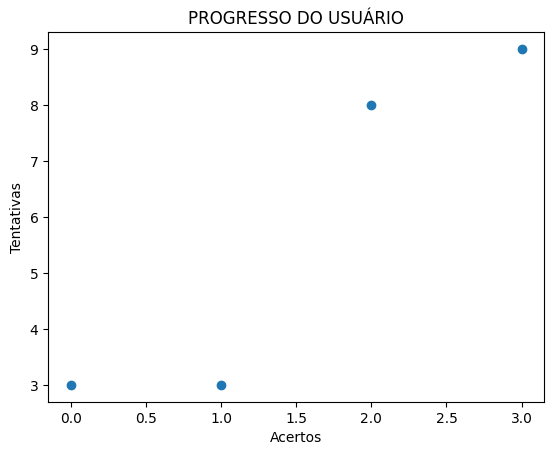

In [66]:
tentativas = range(len(df))
acertos = df['Acertos']
duracao = df['Média tempo resposta(s)']

plt.scatter(tentativas, acertos)
plt.title('PROGRESSO DO USUÁRIO')
plt.xlabel('Acertos')
plt.ylabel('Tentativas')
plt.show()

In [67]:
pip install statsmodels

In [68]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [69]:
# Criação do modelo
#               eixo    y            x
regressao = smf.ols('tentativas ~ acertos', data = df).fit()

In [70]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             tentativas   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 29 Mar 2024   Prob (F-statistic):             0.0726
Time:                        13:18:31   Log-Likelihood:                -2.1875
No. Observations:                   4   AIC:                             8.375
Df Residuals:                       2   BIC:                             7.148
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6504      0.681     -0.956      0.4

C:\Users\gilso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [71]:
regressao.params

Intercept   -0.650407
acertos      0.373984
dtype: float64

C:\Users\gilso\AppData\Local\Temp\ipykernel_36280\3170914987.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


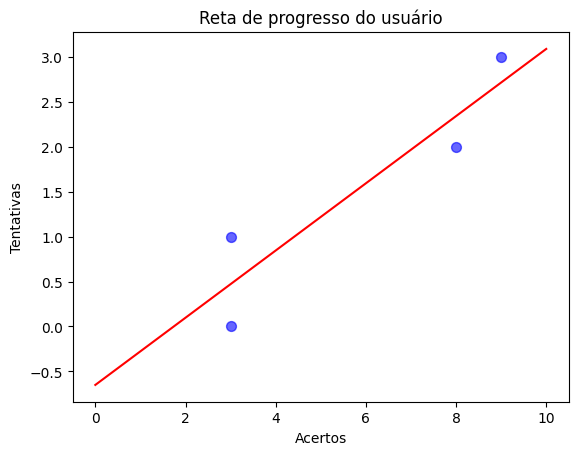

In [72]:
plt.scatter(y=tentativas, x=acertos, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 10)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de progresso do usuário')
plt.ylabel('Tentativas')
plt.xlabel('Acertos')
plt.show()

# Regressão Polinomial

In [73]:
modelo2 = np.poly1d(np.polyfit(acertos, tentativas, 2))

In [74]:
y2 = modelo2(acertos)
y2

array([0.5, 0.5, 2. , 3. ])

In [75]:
modelo2.coef

array([ 0.11666667, -0.98333333,  2.4       ])

In [76]:
print("Equação: tentativa = {:.1f}*acertos^2 + {:.1f}*acertos + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: tentativa = 0.1*acertos^2 + -1.0*acertos + 2.4


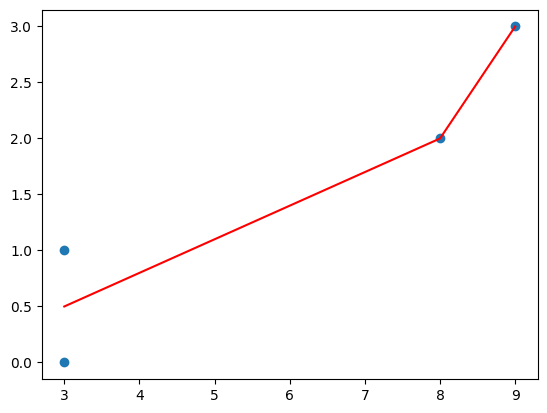

In [77]:
plt.scatter(acertos, tentativas)
plt.plot(acertos,y2,color='red')

<Figure size 1000x600 with 0 Axes>

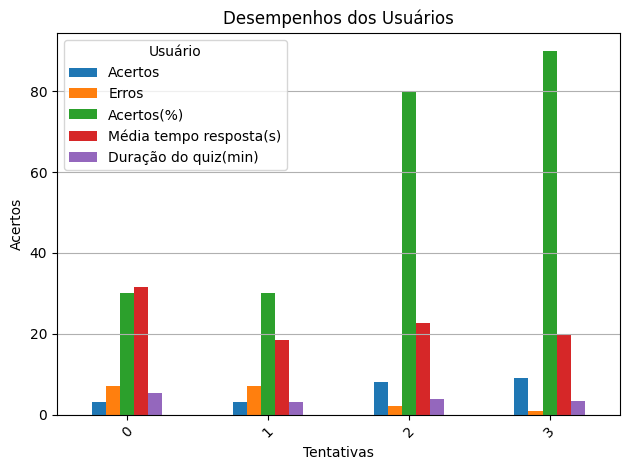

In [78]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=False)
                
plt.title("Desempenhos dos Usuários")
plt.xlabel("Tentativas")
plt.ylabel("Acertos")
plt.xticks(rotation=45)
plt.legend(title='Usuário')
plt.grid(axis='y')
plt.tight_layout()
plt.show()